# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_respond = requests.get(btc_url).json()
btc_price = btc_respond['data']['1']['quotes']['USD']['price']
btc_price
# Fetch current ETH price
# YOUR CODE HERE!
eth_respond = requests.get(eth_url).json()
eth_price = eth_respond['data']['1027']['quotes']['USD']['price']
eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40264.80
The current value of your 5.3 ETH is $11325.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 200
my_agg = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-07-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ['AGG','SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1
).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio


AGG                                      SPY  \
                              open    high     low   close   volume    open   
time                                                                          
2021-07-09 00:00:00-04:00  115.735  115.76  115.69  115.69  4602694  432.53   

                                                              
                             high      low   close    volume  
time                                                          
2021-07-09 00:00:00-04:00  435.84  430.714  435.48  59254094

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.69
Current SPY closing price: $435.48


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 200 SPY shares is $87096.00
The current value of your 50 AGG shares is $5784.50


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
crypto_tendies = my_btc_value + my_eth_value
stock_tendies = my_agg_value + my_spy_value
savings_data = [crypto_tendies, stock_tendies]
df_savings = pd.DataFrame(savings_data, index=['Crypto','Shares'], columns=['amount'])
# Display savings DataFrame
display(df_savings)

,amount
Crypto,51590.158
Shares,92880.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

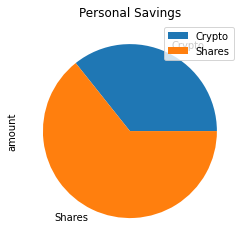

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',title= 'Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_tendies + stock_tendies
# Validate saving health
# YOUR CODE HERE!
if (total_savings > emergency_fund):
    print('Yah Dude! Your Safety net has Kevlar® stitching!')
elif (total_savings == emergency_fund):
    print('Alright! Your Saftey Net is in place.')
else:
    diff = emergency_fund - total_savings
    print(f'Your saftey net has a hole about ${diff} big.')

Yah Dude! Your Safety net has Kevlar® stitching!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ['AGG','SPY']

df_stock_d1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000).df
# Display sample data(DataFrame was renamed(read cell below))
df_stock_d1.dropna()
df_stock_d1.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-07-17 00:00:00-04:00  109.40  109.48  109.32  109.41  1910544.0     NaN   
2017-07-18 00:00:00-04:00  109.64  109.71  109.58  109.68  2471170.0  245.06   
2017-07-19 00:00:00-04:00  109.72  109.75  109.63  109.70  1405289.0  246.02   
2017-07-20 00:00:00-04:00  109.85  109.88  109.70  109.74  1568327.0  247.28   
2017-07-21 00:00:00-04:00  109.88  109.96  109.83  109.90  1406859.0  246.45   

                                                               
                             high     low   close      volume  
time                                                           
2017-07-17 00:00:00-04:00     NaN     NaN     NaN         NaN  
2017-07-18 00:00:00-04:00  245.72  244.67  245.69  31695494.0  
2017-07-19 00:00:00-04:00  247.00  246.01  246.99  31007738.0  
2017-07-20 00:00:00-04:00  247.42  246.47  247.07  33642116.0  
2017-07-21 00:00:00-04:00  246.91  246.18  246.89  38750037.0

In [16]:
#Using this method did not get me a full 5 years due to the 1000 default limit.
# To get the full 5 years, im going to make a seperate df covering the missing time 
start_date2 = pd.Timestamp('2016-07-07', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2017-07-07', tz='America/New_York').isoformat()

df_stock_d2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit = 1000).df
#Then concat it w/ the df that has the full timeframe
df_stock_data = pd.concat([df_stock_d2,df_stock_d1])
df_stock_data.head()
#That did the trick! The full 5 years of data are now in one df.

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2016-07-07 00:00:00-04:00  113.00  113.1715  112.920  113.07  2888149.0   
2016-07-08 00:00:00-04:00  113.08  113.2700  113.000  113.27  2618570.0   
2016-07-11 00:00:00-04:00  113.19  113.2200  112.930  112.94  4226182.0   
2016-07-12 00:00:00-04:00  112.81  112.8100  112.485  112.62  1764336.0   
2016-07-13 00:00:00-04:00  112.82  112.8800  112.741  112.78  2035839.0   

                              SPY                                          
                             open      high       low   close      volume  
time                                                                       
2016-07-07 00:00:00-04:00  209.87  210.6495  208.6300  209.53  68073147.0  
2016-07-08 00:00:00-04:00  211.05  212.9400  210.7785  212.65  89811809.0  
2016-07-11 00:00:00-04:00  213.19  214.0700  212.9500  213.41  58385635.0  
2016-07-12 00:00:00-04:00  214.52  215.3000  214.2500  214.94  69764775.0  
2016-07-13 00:00:00-04:00  215.44  215.4500  214.3500  214.92  62326385.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)


In [18]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_yr.portfolio_data.dropna()
MC_30_yr.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2016-07-07 00:00:00-04:00  113.00  113.1715  112.920  113.07  2888149.0   
2016-07-08 00:00:00-04:00  113.08  113.2700  113.000  113.27  2618570.0   
2016-07-11 00:00:00-04:00  113.19  113.2200  112.930  112.94  4226182.0   
2016-07-12 00:00:00-04:00  112.81  112.8100  112.485  112.62  1764336.0   
2016-07-13 00:00:00-04:00  112.82  112.8800  112.741  112.78  2035839.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2016-07-07 00:00:00-04:00          NaN  209.87  210.6495  208.6300  209.53   
2016-07-08 00:00:00-04:00     0.001769  211.05  212.9400  210.7785  212.65   
2016-07-11 00:00:00-04:00    -0.002913  213.19  214.0700  212.9500  213.41   
2016-07-12 00:00:00-04:00    -0.002833  214.52  215.3000  214.2500  214.94   
2016-07-13 00:00:00-04:00     0.001421  215.44  215.4500  214.3500  214.92   

                                                    
                               volume daily_return  
time                                                
2016-07-07 00:00:00-04:00  68073147.0          NaN  
2016-07-08 00:00:00-04:00  89811809.0     0.014890  
2016-07-11 00:00:00-04:00  58385635.0     0.003574  
2016-07-12 00:00:00-04:00  69764775.0     0.007169  
2016-07-13 00:00:00-04:00  62326385.0    -0.000093

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999196,1.009733,1.006531,0.992807,0.993227,1.006527,0.998762,0.997951,0.995895,0.975530,...,1.002355,1.002840,0.998320,0.988236,1.010300,1.005300,1.004151,0.993591,0.993752,1.005357
2,1.021496,0.995404,1.009262,0.990494,0.995017,1.008869,1.019451,0.993056,1.006054,0.986102,...,0.995664,1.007586,0.990413,0.980748,1.009813,1.016196,1.015989,0.986242,0.986384,1.004250
3,1.025411,0.999513,1.013383,0.992415,1.002572,1.018713,1.007696,1.000701,1.013096,0.987965,...,0.998533,0.993892,0.989940,0.970395,1.007969,1.023656,1.014013,0.978706,0.983037,1.002979
4,1.034075,1.011784,1.020900,0.989503,0.997007,1.017156,1.008070,1.003620,1.012741,0.973667,...,0.997827,0.987821,0.990664,0.976244,1.011749,1.019259,1.007091,0.971037,0.977855,0.999357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.529003,44.190022,12.725860,14.507677,19.624581,17.863749,48.419891,27.795862,11.197514,10.860894,...,30.088991,13.555902,23.192955,20.815053,21.880051,17.337275,16.559504,9.856478,24.322992,25.252148
7557,25.515808,44.779008,12.619404,14.700397,19.831330,17.911057,48.850152,28.407605,11.219078,10.806722,...,29.972789,13.578862,23.761205,20.731870,22.028052,17.328764,16.416811,9.904350,24.294820,24.997740
7558,25.182039,45.174894,12.741360,14.843976,20.074939,17.707581,49.479210,28.395983,11.205117,10.904090,...,29.946423,13.602251,23.845783,20.571457,22.020393,17.373295,16.580674,9.943932,24.481830,25.045052
7559,25.253889,45.596299,12.805769,14.921869,20.079212,17.769392,49.051902,28.609009,11.178580,10.840582,...,30.094339,13.836302,23.993625,20.702893,22.114909,17.289403,16.559723,9.960772,24.718195,24.893988


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

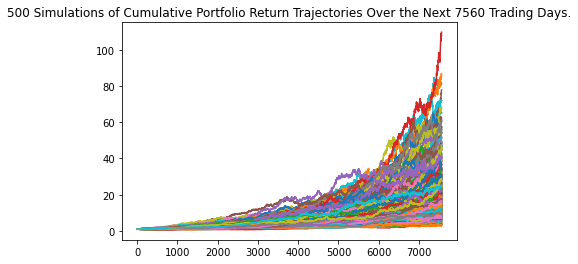

In [20]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_30_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

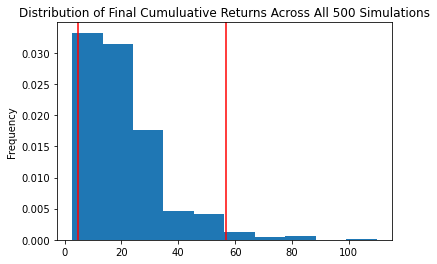

In [21]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_30_yr.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC_30_yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary

count           500.000000
mean             21.047998
std              14.033224
min               2.661676
25%              11.393965
50%              17.209087
75%              26.812952
max             109.728948
95% CI Lower      4.594579
95% CI Upper     56.698033
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91891.57 and $1133960.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $137837.36 and $1700940.98


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*5
) 

In [59]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005204,0.994287,0.989984,0.999393,1.000772,0.998739,0.992212,0.997530,1.001859,0.998921,...,1.000345,1.003538,1.003350,1.001201,1.001202,0.999796,1.005886,0.997745,0.994525,0.992851
2,1.004508,1.000278,0.989978,1.002615,1.009080,0.992863,0.993100,0.994024,0.995827,0.999094,...,0.995504,0.993646,1.007607,0.996727,1.003052,1.007679,1.007812,1.010319,0.996271,0.981807
3,1.005653,1.000083,0.987265,0.995433,1.002085,0.997631,0.991763,0.996347,1.009951,0.990141,...,0.996519,0.996750,1.014441,0.985063,1.002494,1.000401,1.020296,1.008165,0.999234,0.985966
4,1.005320,1.000200,0.987874,0.995006,1.012665,0.993373,0.999124,1.001855,1.010364,0.992404,...,1.002525,0.996083,1.017346,0.990332,1.012674,1.005107,1.019131,1.001068,0.997605,0.985572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.283640,1.235424,1.583023,1.154550,1.083094,1.400494,0.966006,1.329400,1.124389,1.156831,...,1.305187,1.140238,1.687867,1.329701,1.254512,2.008087,1.197198,1.566078,1.538861,1.053515
1257,1.285013,1.240151,1.567709,1.148225,1.082900,1.403005,0.968728,1.329473,1.119723,1.157965,...,1.312406,1.135800,1.667082,1.324389,1.262560,2.012298,1.198882,1.571250,1.538535,1.041262
1258,1.282725,1.239482,1.563794,1.145937,1.077168,1.404217,0.966989,1.330963,1.121857,1.154275,...,1.316866,1.143881,1.659454,1.321455,1.265377,2.015152,1.202157,1.570701,1.546468,1.042056
1259,1.290256,1.234741,1.556501,1.158448,1.080573,1.401626,0.966881,1.331319,1.129866,1.150583,...,1.322322,1.144191,1.656057,1.322433,1.263392,2.036993,1.206554,1.565502,1.550820,1.039967


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

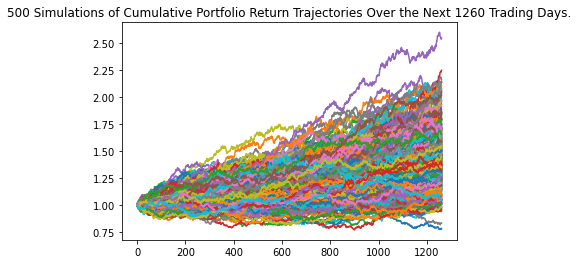

In [60]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_5_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

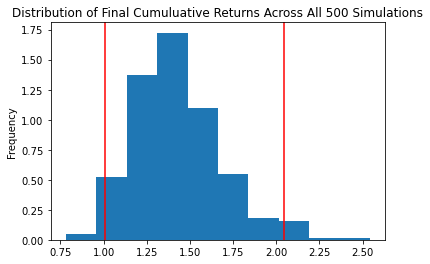

In [61]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_5_yr.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_5_yr = MC_5_yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary_5_yr

count           500.000000
mean              1.422620
std               0.253583
min               0.780736
25%               1.248848
50%               1.397039
75%               1.571882
max               2.543905
95% CI Lower      1.007738
95% CI Upper      2.042991
Name: 1260, dtype: float64

In [63]:
# Set initial investment
# YOUR CODE HERE!
init_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_5_yr[8] * init_investment, 2)
ci_upper_five = round(summary_5_yr[9] * init_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $60464.26 and $122579.46


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.7, 0.3],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002494,0.998340,1.009653,1.002250,1.001380,1.004958,0.997748,0.998956,0.999925,0.998486,...,0.999753,0.996572,0.999889,1.003626,1.005245,0.997545,0.999397,1.005431,1.005605,0.995758
2,1.012539,0.995796,1.004616,1.018093,1.009335,1.008274,0.996007,0.996678,0.991501,1.000678,...,0.998092,0.991837,0.999717,1.010380,1.010816,1.001976,1.000316,1.005796,1.001963,0.996572
3,1.012235,0.999684,1.003138,1.023717,1.005504,1.016392,0.993956,0.994044,0.996274,1.002273,...,0.996222,0.994093,1.003728,1.013861,1.006113,1.000867,1.007793,1.009615,0.998707,1.001894
4,1.014818,0.998544,1.003316,1.022466,1.002986,1.017182,0.995777,0.995247,0.997214,1.009434,...,0.993951,0.995853,1.001288,1.013834,1.004196,0.994225,1.004007,1.011238,0.999307,1.000114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.683334,1.246391,1.867293,2.166967,1.432661,1.423187,1.865429,1.537106,1.756435,1.172356,...,2.120858,1.522041,2.045378,1.246342,1.033546,1.582759,1.469261,1.898421,1.199755,1.251840
2517,1.681462,1.240533,1.848450,2.156961,1.436216,1.414734,1.860564,1.528143,1.748014,1.169407,...,2.108357,1.522815,2.041656,1.248619,1.037338,1.590289,1.466011,1.903312,1.190977,1.243162
2518,1.682491,1.229386,1.852064,2.148601,1.443876,1.408776,1.851243,1.526176,1.748265,1.172969,...,2.114803,1.516554,2.036053,1.246876,1.038276,1.585905,1.462783,1.900601,1.202167,1.254292
2519,1.693213,1.222592,1.850561,2.138798,1.438007,1.405253,1.857192,1.527875,1.747210,1.163242,...,2.120438,1.522800,2.042908,1.246874,1.037853,1.591463,1.465386,1.904341,1.202272,1.250467


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

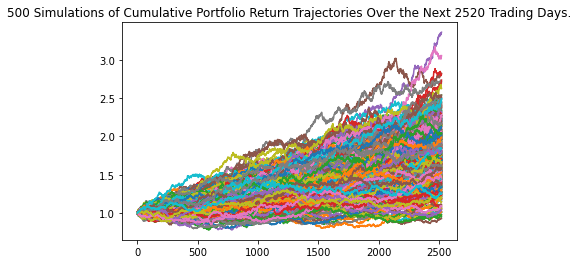

In [67]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_10_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

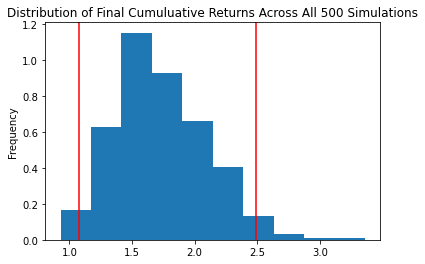

In [68]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10_yr.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_10_yr = MC_10_yr.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
summary_10_yr

count           500.000000
mean              1.729144
std               0.364906
min               0.928430
25%               1.474910
50%               1.692121
75%               1.986154
max               3.359260
95% CI Lower      1.077199
95% CI Upper      2.485759
Name: 2520, dtype: float64

In [71]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_10_yr[8] * initial_investment, 2)
ci_upper_ten = round(summary_10_yr[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64631.93 and $149145.55
